In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [216]:
train = pd.read_csv("train.csv",encoding='latin_1',na_values=['#NAME?'])
test = pd.read_csv("test.csv",encoding='latin_1',na_values=['#NAME?'])
ss = pd.read_csv("sampleSubmission.csv",encoding='latin_1',na_values=['#NAME?'])

In [217]:
train.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


In [218]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,60001,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000.0,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
1,60002,21/03/16 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000.0,2,NaN,volkswagen,No,21/03/16 0:00,0,90762,23/03/16 2:50
2,60003,21/03/16 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000.0,3,diesel,nissan,No,21/03/16 0:00,0,4177,06/04/16 7:45
3,60004,23/03/16 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000.0,6,diesel,ford,No,23/03/16 0:00,0,88361,05/04/16 18:45
4,60005,18/03/16 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000.0,9,diesel,bmw,Yes,18/03/16 0:00,0,73765,18/03/16 21:44


In [219]:
print(train.shape)
print(test.shape)
print(ss.shape)

(58857, 20)
(19609, 19)
(36, 2)


In [220]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [221]:
print("x9")
x9_indices,x9_values = find_outliers_tukey(train['x9'])
print(np.sort(x9_values))
print("x11")
x11_indices,x11_values = find_outliers_tukey(train['x11'])
print(np.sort(x11_values))

x9
[  279   279   279 ... 17322 17932 19211]
x11
[]


In [222]:
train.loc[train.x9>250,"x9"]=np.nan
train.x9 = train.x9.transform(lambda x : x.fillna(x.median()))

In [223]:
train.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94.0,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140.0,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150.0,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150.0,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200.0,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


In [224]:
train["source"] = "train"
test["source"] = "test"

In [225]:
dataf = pd.concat([train,test],axis=0,sort=False)
dataf.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,source
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850.0,Small Car,2004,manual,94.0,...,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15,train
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999.0,Combi,2007,manual,140.0,...,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15,train
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990.0,limousine,2007,automatic,150.0,...,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38,train
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000.0,limousine,2005,manual,150.0,...,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45,train
4,5,17/03/16 17:49,Audi_A4,private,offer,12950.0,Combi,2005,manual,200.0,...,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17,train


In [199]:
dataf.nunique()

x1        78466
x2        12880
x3        52600
x4            1
x5            1
y          2358
x6            8
x7           17
x8            2
x9          341
x10         235
x11          13
x12          13
x13           7
x14          38
x15           2
x16          80
x17           1
x18        7419
x19       11941
source        2
dtype: int64

In [97]:
dataf.isna().sum()

x1            0
x2            0
x3            0
x4            0
x5            0
y         19609
x6         2480
x7            0
x8         2224
x9            0
x10           0
x11           0
x12           0
x13        2839
x14           0
x15        9098
x16           0
x17           0
x18           0
x19           0
source        0
dtype: int64

In [98]:
dataf[dataf.duplicated()].sum()

x1        0.0
x2        0.0
x3        0.0
x4        0.0
x5        0.0
y         0.0
x6        0.0
x7        0.0
x8        0.0
x9        0.0
x10       0.0
x11       0.0
x12       0.0
x13       0.0
x14       0.0
x15       0.0
x16       0.0
x17       0.0
x18       0.0
x19       0.0
source    0.0
dtype: float64

In [58]:
pandas_profiling.ProfileReport(dataf)

Number of variables,22
Number of observations,78466
Total Missing (%),2.1%
Total size in memory,13.2 MiB
Average record size in memory,176.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,3


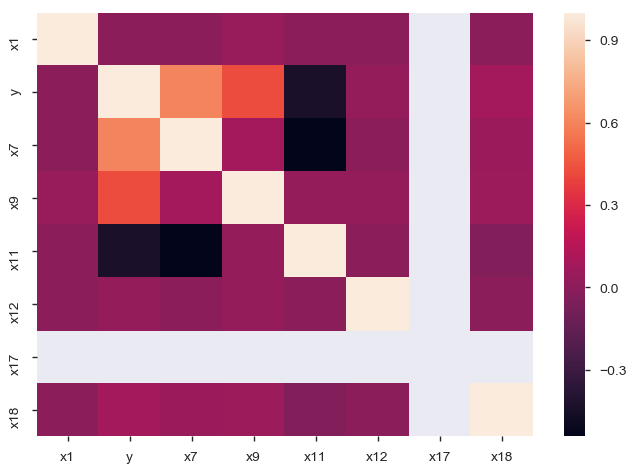

In [59]:
# calculate the correlation matrix
corr = dataf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [146]:
dataf.describe(percentiles=[0.95])

,x1,y,x7,x9,x11,x12,x17,x18
count,78466.000000,58857.000000,78466.000000,78466.000000,78466.000000,78466.000000,78466.0,78466.000000
mean,39519.140749,7638.980971,2006.285066,122.328333,120115.910076,6.176854,0.0,51912.579984
std,23024.762905,6710.787043,4.026041,69.490912,41245.291086,3.522743,0.0,25632.180866
min,1.000000,1001.000000,2000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
50%,39233.500000,5400.000000,2006.000000,116.000000,150000.000000,6.000000,0.0,51065.000000
95%,75685.750000,21999.000000,2013.000000,224.000000,150000.000000,12.000000,0.0,93083.000000
max,79609.000000,39800.000000,2016.000000,10218.000000,150000.000000,12.000000,0.0,99998.000000


In [226]:
def applymode(x):
    a = x.mode()[0]
    return x.fillna(a)

In [227]:
dataf.x6=dataf.groupby(["x14"]).x6.transform(applymode)
dataf.x8=dataf.groupby(["x14"]).x8.transform(applymode)
dataf.x13=dataf.groupby(["x14","x8"]).x13.transform(applymode)
dataf.x15=dataf.groupby(['x11']).x15.transform(applymode)

In [228]:
dataf['Age of car']=2018-dataf.x7

In [214]:
dataf.drop(columns=["x2","x3","x4","x5","x7","x8","x10","x11","x12","x15,""x16","x17","x18","x19"],inplace=True)
#x12

KeyError: "labels ['x2' 'x3' 'x4' 'x5' 'x7' 'x10' 'x12' 'x15,x16' 'x17' 'x18' 'x19'] not contained in axis"

In [204]:
dataf_col_category = dataf.select_dtypes(exclude=[np.number]).columns
dataf_col_Integer = dataf.columns.difference(dataf_col_category)
dataf[dataf_col_category].nunique()

x6         8
x8         2
x13        7
x14       38
x15        2
source     2
dtype: int64

In [205]:
Y=dataf['x6']
le=LabelEncoder()
Y1=le.fit_transform(Y)
dataf['x6']=Y1
Y=dataf['x13']
le=LabelEncoder()
Y1=le.fit_transform(Y)
dataf['x13']=Y1
Y=dataf['x14']
le=LabelEncoder()
Y1=le.fit_transform(Y)
dataf['x14']=Y1

In [206]:
dataf_one_hot = pd.get_dummies(dataf[["x8","x15","source"]])

In [207]:
data_model = pd.concat([dataf[["x6","x13","x14"]],dataf_one_hot,dataf[dataf_col_Integer]],axis=1)
data_model.head()

,x6,x13,x14,x8_automatic,x8_manual,x15_No,x15_Yes,source_test,source_train,Age of car,x1,x11,x9,y
0,2,6,33,0,1,1,0,0,1,14,1,50000.0,94.0,3850.0
1,0,1,36,0,1,1,0,0,1,11,2,150000.0,140.0,5999.0
2,6,1,20,1,0,1,0,0,1,11,3,150000.0,150.0,5990.0
3,6,1,0,0,1,1,0,0,1,13,4,150000.0,150.0,4000.0
4,0,6,1,0,1,1,0,0,1,13,5,125000.0,200.0,12950.0


In [208]:
scalar=StandardScaler()
x=data_model.loc[:,["x11"]]
data_model["x11"]=scalar.fit_transform(x)
#x=data_model.loc[:,["y"]]
#data_model["y"]=scalar.fit_transform(x)

In [209]:
data_model.head()

,x6,x13,x14,x8_automatic,x8_manual,x15_No,x15_Yes,source_test,source_train,Age of car,x1,x11,x9,y
0,2,6,33,0,1,1,0,0,1,14,1,-1.699985,94.0,3850.0
1,0,1,36,0,1,1,0,0,1,11,2,0.724550,140.0,5999.0
2,6,1,20,1,0,1,0,0,1,11,3,0.724550,150.0,5990.0
3,6,1,0,0,1,1,0,0,1,13,4,0.724550,150.0,4000.0
4,0,6,1,0,1,1,0,0,1,13,5,0.118416,200.0,12950.0


In [210]:
train_modified = data_model.loc[data_model.source_train==1.0,:]
test_modified = data_model.loc[data_model.source_train==0.0,:]
train_modified=train_modified.drop(['source_test', 'source_train'],axis=1)
test_modified=test_modified.drop(['source_test', 'source_train','y'],axis=1)

In [211]:
train_modified.head()

,x6,x13,x14,x8_automatic,x8_manual,x15_No,x15_Yes,Age of car,x1,x11,x9,y
0,2,6,33,0,1,1,0,14,1,-1.699985,94.0,3850.0
1,0,1,36,0,1,1,0,11,2,0.724550,140.0,5999.0
2,6,1,20,1,0,1,0,11,3,0.724550,150.0,5990.0
3,6,1,0,0,1,1,0,13,4,0.724550,150.0,4000.0
4,0,6,1,0,1,1,0,13,5,0.118416,200.0,12950.0


In [212]:
test_modified.head()

,x6,x13,x14,x8_automatic,x8_manual,x15_No,x15_Yes,Age of car,x1,x11,x9
0,7,1,14,1,0,1,0,14,60001,0.118416,163.0
1,0,6,36,0,1,1,0,14,60002,0.724550,131.0
2,7,1,23,0,1,1,0,7,60003,-1.215078,190.0
3,3,1,10,0,1,1,0,11,60004,0.724550,136.0
4,0,1,2,1,0,0,1,16,60005,0.724550,193.0


In [213]:
train_modified.to_csv("train_ready_for_model.csv",index=False)
test_modified.to_csv("test_ready_for_model.csv",index=False)